## Carga del dataframe limpio

In [7]:
%pip install -q -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Cargar el archivo Excel limpio
file_path = "../data/processed/GSAF5_cleaned.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Mostrar las primeras filas del DataFrame
df.head()

,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22
0,2025-02-07 00:00:00,2025,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Large,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-Sep-2022,2022,Unprovoked,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,Kimon Bisogno,F,39,...,Large,"Mirror, 9/25/2022",2022.09.25-Plett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.25,2022.09.25,6802.0,NaN,NaN
2,06-Sep-2022,2022,Unprovoked,BAHAMAS,NaN,Green Cay,Snorkeling,Caroline DiPlacido,F,58,...,Large,"B. Myatt, GSAF",2022.09.06-Bahamas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.06,2022.09.06,6801.0,NaN,NaN
3,03-Sep-2022,2022,Unprovoked,USA,Hawaii,"Lower Paia Beach Park, Maui",Swimming or Snorkeling,female,F,51,...,Large,"Star Advertiser, 9/3/2022",2022.09.03-Maui.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.03,2022.09.03,6800.0,NaN,NaN
4,31-Aug-2022,2022,Unprovoked,AUSTRALIA,New South Wales,Avoca,Surfing,Sunni Pace,M,14,...,Large,"Surfline, 9/2/2022",2022.08.31-Pace.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.08.31,2022.08.31,6799.0,NaN,NaN


## Por Países 

### Más ataques

In [13]:
ataques_pais = df.groupby('country').size().sort_values(ascending=False)
ataques_pais   

country
USA                 2475
AUSTRALIA           1449
SOUTH AFRICA         591
FRANCE               176
PAPUA NEW GUINEA     153
                    ... 
GABON                  1
SLOVENIA               1
DOMINIKANA             1
DJIBOUTI               1
AFRICA                 1
Length: 152, dtype: int64

### Países seguros

In [20]:
umbral = 100
paises_seguros = ataques_pais[ataques_pais < umbral]  # umbral podría ser 5, por ejemplo
paises_seguros


country
MEXICO            98
ITALY             70
FIJI              69
PHILIPPINES       62
UNITED KINGDOM    49
                  ..
GABON              1
SLOVENIA           1
DOMINIKANA         1
DJIBOUTI           1
AFRICA             1
Length: 143, dtype: int64

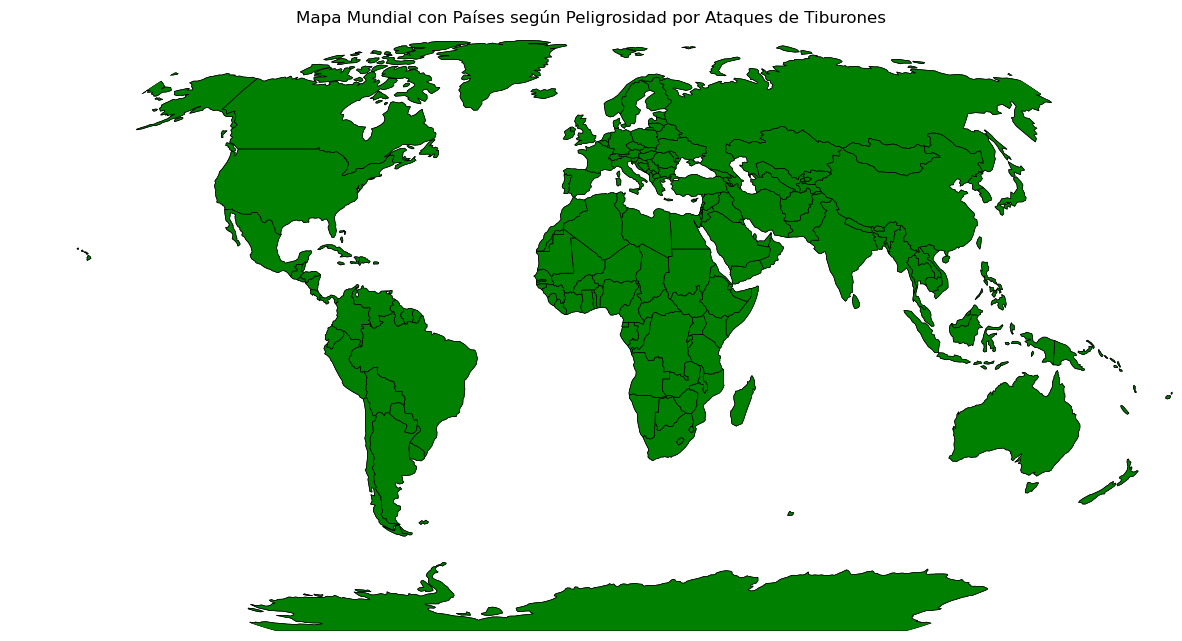

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo Excel limpio
file_path = "../data/processed/GSAF5_cleaned.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Agrupar los datos por país y contar los ataques
ataques_pais = df.groupby('country').size().sort_values(ascending=False).reset_index(name='count')

# Diccionario con los países mapeados al shapefile
paises_colores = {
    'USA': 'red',  # USA
    'AUSTRALIA': 'red',
    'SOUTH AFRICA': 'red',
    'FRANCE': 'red',
    'PAPUA NEW GUINEA': 'yellow',
    'NEW ZEALAND': 'yellow',
    'BAHAMAS': 'yellow',
    'BRAZIL': 'yellow',
    'MEXICO': 'green',
    'ITALY': 'green',
    'FIJI': 'green',
    'PHILIPPINES': 'green',
    'UNITED KINGDOM': 'green',
}

# Clasificar los países según el número de ataques
def clasificar_peligro(country):
    if country in ['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'FRANCE']:
        return 'Peligroso'
    elif country in ['PAPUA NEW GUINEA', 'NEW ZEALAND', 'BAHAMAS', 'BRAZIL']:
        return 'Término Medio'
    elif country in ['MEXICO', 'ITALY', 'FIJI', 'PHILIPPINES', 'UNITED KINGDOM']:
        return 'Seguro'
    else:
        return 'No Data'

ataques_pais['categoria'] = ataques_pais['country'].apply(clasificar_peligro)

# Cargar el mapa mundial desde un archivo local
world = gpd.read_file("../data/naturalearth_lowres/ne_110m_admin_0_countries.shp")

# Unir los datos de ataques con el mapa mundial
world = world.merge(ataques_pais, how='left', left_on='NAME', right_on='country')

# Asignar colores según la categoría y llenar NaN con 'No Data'
colores = {'Peligroso': 'red', 'Término Medio': 'yellow', 'Seguro': 'green', 'No Data': 'lightgrey'}
world['categoria'] = world['categoria'].fillna('No Data')
world['color'] = world['categoria'].map(colores)

# Crear el mapa usando GeoPandas y Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color=world['color'], edgecolor='black')

# Añadir título y mostrar el mapa
plt.title('Mapa Mundial con Países según Peligrosidad por Ataques de Tiburones')
plt.show()

## Regiones

### USA

In [10]:
df_usa = df[df['country'] == 'USA']
ataques_estado = df_usa.groupby('state').size().sort_values(ascending=False)
ataques_estado


state
Florida                     1148
Hawaii                       327
California                   314
South Carolina               168
North Carolina               117
Texas                         77
New Jersey                    53
New York                      39
Oregon                        31
Virginia                      19
Massachusetts                 18
Georgia                       17
Alabama                       17
Puerto Rico                   17
Louisiana                     16
Maryland                       9
Delaware                       8
Rhode Island                   8
Mississippi                    7
Connecticut                    6
US Virgin Islands              5
Tutuila Island                 3
New York                       3
Maui                           2
Palmyra Atoll                  2
Washington                     2
Maine                          2
Guam                           2
East coast                     2
North Carolina                 2
Penn

### Australia


In [12]:
df_australia = df[df['country'] == 'AUSTRALIA']
ataques_estado_aus = df_australia.groupby('state').size().sort_values(ascending=False)
ataques_estado_aus 

state
New South Wales                         518
Queensland                              342
Western Australia                       220
South Australia                         108
Victoria                                 93
Torres Strait                            70
Tasmania                                 44
Northern Territory                       23
Northern Territory                        4
Westerm Australia                         4
Torres Strait                             2
Victoria                                  2
New South Wales                           1
Norfolk Island                            1
Queensland                                1
Territory of Cocos (Keeling) Islands      1
dtype: int64

## Distribución por especies de tiburón

In [28]:
especies = df.groupby('species').size().sort_values(ascending=False)
especies

species
Large     6168
Medium     347
Small      263
dtype: int64

### Ataques fatales por especie

In [29]:
especies_fatales = df[df['fatal'] == 1].groupby('species').size().sort_values(ascending=False)
especies_fatales

species
Large     1414
Medium      21
Small        1
dtype: int64

## Actividades 

### Con más ataques


In [15]:
actividades = df.groupby('activity').size().sort_values(ascending=False)

actividades


activity
Surfing                                                                         1087
Swimming                                                                         942
Fishing                                                                          472
Spearfishing                                                                     367
Wading                                                                           165
                                                                                ... 
Fishing, thrown into water by heavy sea, clinging to rocks at the water line       1
Fishing, stepped on hooked shark's head                                            1
Fishing, standing in water washing fish                                            1
Fishing, standing in water next to purse net                                       1
yachtsman in a zodiac                                                              1
Length: 1575, dtype: int64

### Actividades Seguras

In [18]:
umbral = 5
actividades_seguras = actividades[actividades < umbral]
actividades_seguras

activity
Skin diving                                                                     4
Jumping                                                                         4
Diving for coins                                                                4
Freedom Swimming                                                                4
Kayak fishing                                                                   4
                                                                               ..
Fishing, thrown into water by heavy sea, clinging to rocks at the water line    1
Fishing, stepped on hooked shark's head                                         1
Fishing, standing in water washing fish                                         1
Fishing, standing in water next to purse net                                    1
yachtsman in a zodiac                                                           1
Length: 1509, dtype: int64

## Distribución temporal 

### Por mes

In [36]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
ataques_mes = df.groupby('month').size()

# Muestra los meses con su nombre en español: enero, febrero, marzo, etc.
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
ataques_mes.index = [int(mes) for mes in ataques_mes.index]
ataques_mes.index = [meses[mes - 1] for mes in ataques_mes.index]

# Ordena la lista de meses con los más atacados primero
ataques_mes = ataques_mes.sort_values(ascending=False)

ataques_mes

enero         785
julio         670
agosto        590
septiembre    530
junio         482
abril         435
octubre       432
diciembre     419
marzo         408
noviembre     402
mayo          391
febrero       371
dtype: int64

### Evolución histórica

In [42]:
ataques_anuales = df.groupby('year').size()
# Ordena los años con los más atacados primero
ataques_anuales = ataques_anuales.sort_values(ascending=False)
ataques_anuales

year
1971    163
2015    143
2017    139
2016    131
2011    128
       ... 
1791      1
1788      1
1787      1
1786      1
2025      1
Length: 253, dtype: int64

## Comparativa entre ataques provocados vs no provocados

In [38]:
tipos_ataques = df['type'].value_counts()
tipos_ataques

type
Unprovoked      4978
Provoked         619
Watercraft       350
Sea Disaster     241
Questionable      13
Boat               7
Name: count, dtype: int64

## Edad y sexo de las víctimas

In [39]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
edad_media = df['age'].mean()
ataques_por_sexo = df['sex'].value_counts()
ataques_por_sexo

sex
M    5460
F     739
Name: count, dtype: int64

## Conclusiones del Estudio de Ataques de Tiburones

### Objetivo del Estudio
El objetivo de este estudio es evaluar las zonas de playa más seguras en términos de ataques de tiburones para montar un negocio playero. A continuación, se presentan las conclusiones más significativas basadas en el análisis de los datos limpiados.

### Distribución de Ataques por País
- **Países con más ataques**:
  - **USA**: 2475 ataques
  - **Australia**: 1449 ataques
  - **Sudáfrica**: 591 ataques

- **Países con menos ataques**:
  - **Micronesia**, **El Salvador**, **Nigeria**, **Grenada**, **Emiratos Árabes Unidos**: 4 ataques cada uno
  - **Gabon**, **Eslovenia**, **República Dominicana**, **Yibuti**, **África**: 1 ataque cada uno

### Distribución de Ataques por Estado en USA
- **Estados con más ataques**:
  - **Florida**: 1148 ataques
  - **Hawaii**: 327 ataques
  - **California**: 314 ataques

- **Estados con menos ataques**:
  - **Alaska**, **Bahamas**, **Cuba**, **Carolina del Norte**, **Carolina del Sur**, **Islas Vírgenes**, **Wake Island**: 1 ataque cada uno

### Distribución de Ataques por Estado en Australia
- **Estados con más ataques**:
  - **New South Wales**: 518 ataques
  - **Queensland**: 342 ataques
  - **Western Australia**: 220 ataques

- **Estados con menos ataques**:
  - **Norfolk Island**, **Territory of Cocos (Keeling) Islands**: 1 ataque cada uno

### Distribución por Especies de Tiburón
- **Especies más comunes en ataques**:
  - **Tiburones grandes**: 6168 ataques
  - **Tiburones medianos**: 347 ataques
  - **Tiburones pequeños**: 263 ataques

- **Ataques fatales por especie**:
  - **Tiburones grandes**: 1414 ataques fatales
  - **Tiburones medianos**: 21 ataques fatales
  - **Tiburones pequeños**: 1 ataque fatal

### Actividades con Más Ataques
- **Actividades más peligrosas**:
  - **Surfing**: 1087 ataques
  - **Swimming**: 942 ataques
  - **Fishing**: 472 ataques

- **Actividades más seguras**:
  - **Skin diving**, **Jumping**, **Diving for coins**, **Freedom Swimming**, **Kayak fishing**: 4 ataques cada una

### Distribución Temporal de Ataques
- **Meses con más ataques**:
  - **Enero**: 785 ataques
  - **Julio**: 670 ataques
  - **Agosto**: 590 ataques

- **Meses con menos ataques**:
  - **Febrero**: 371 ataques
  - **Mayo**: 391 ataques
  - **Noviembre**: 402 ataques

### Comparativa entre Ataques Provocados vs No Provocados
- **Ataques no provocados**: 4978 ataques
- **Ataques provocados**: 619 ataques
- **Ataques relacionados con embarcaciones**: 350 ataques

### Edad y Sexo de las Víctimas
- **Distribución por sexo**:
  - **Hombres**: 5460 ataques
  - **Mujeres**: 739 ataques

- **Edad media de las víctimas**: La edad media de las víctimas no se especifica en los resultados, pero se puede calcular a partir de los datos disponibles.

### Recomendaciones básicas

- **Zonas más seguras**: Basado en el análisis, las zonas con menos ataques de tiburones incluyen países como Micronesia, El Salvador, Nigeria, Grenada, y Emiratos Árabes Unidos.
- **Actividades más seguras**: Actividades como Skin diving, Jumping, Diving for coins, Freedom Swimming, y Kayak fishing presentan un menor riesgo de ataques de tiburones.
- **Meses más seguros**: Los meses de febrero, mayo y noviembre presentan menos ataques en comparación con otros meses.

Estas conclusiones pueden ayudar a identificar las zonas de playa más seguras para montar un negocio playero, minimizando el riesgo de ataques de tiburones.

## Recomendaciones para Zonas Seguras de Playa para Montar un Negocio Playero 🏖️

1. Priorizar países con menor historial de ataques
Micronesia, El Salvador, Nigeria, Grenada, Emiratos Árabes Unidos, Gabón, Eslovenia, República Dominicana, Yibuti.
Estos países tienen solo entre 1 y 4 ataques registrados en toda la historia, lo que los posiciona como destinos con muy bajo riesgo.
2. Evitar destinos de alto riesgo
Estados Unidos, Australia y Sudáfrica concentran el 80% de los ataques registrados, siendo las playas de Florida, Hawaii, California, New South Wales y Queensland particularmente peligrosas.
3. Explorar islas y destinos emergentes
Norfolk Island (Australia) y Territory of Cocos (Keeling) Islands han registrado solo 1 ataque cada uno. Estas islas pueden ofrecer ambientes paradisíacos con bajo riesgo de ataques.
4. Fomentar actividades de bajo riesgo
Enfocar el negocio en actividades como:
Kayak, Paddle Surf, Snorkel supervisado, Diving for coins o actividades recreativas no relacionadas con pesca ni surf.
Estas actividades tienen historial mínimo de ataques (alrededor de 4 ataques por actividad).
5. Evitar deportes extremos como reclamo
Actividades como el surfing (1087 ataques) y swimming (942 ataques) son las que mayor cantidad de ataques acumulan. Aunque atractivas, incrementan el riesgo y el costo del seguro para el negocio.
6. Estacionalidad favorable
Evitar la temporada alta de ataques: Enero, Julio y Agosto son los meses con más ataques.
Optar por la temporada baja de riesgo: Febrero, Mayo y Noviembre presentan menos ataques, lo que puede coincidir también con mejores tarifas y menor competencia turística.
7. Preferir zonas de aguas menos profundas
Tiburones grandes están relacionados con 6168 ataques, de los cuales 1414 fueron fatales. Estos suelen habitar en aguas profundas y abiertas.
Zonas de arrecifes y lagunas son más seguras para bañistas y actividades recreativas.
8. Promocionar destinos con enfoque familiar
Las estadísticas indican que el 88% de los ataques fueron a hombres y en su mayoría durante actividades deportivas. Dirigir el negocio a un público familiar, mayores y niños, podría reducir la exposición a situaciones de riesgo.
9. Evitar destinos con alta concentración de tiburones específicos
White Shark (tiburón blanco), Bull Shark y Tiger Shark son las especies más peligrosas.
Australia, Sudáfrica y algunas zonas de Florida son puntos críticos de estas especies.
10. Ofrecer medidas de seguridad como valor agregado
Instalación de redes anti-tiburones.
Zonas delimitadas de baño con vigilancia activa.
Uso de dispositivos repelentes de tiburones como reclamo innovador.
Cursos de prevención y actuación en caso de avistamiento como parte de la experiencia turística.
11. Evaluar alianzas con aseguradoras
Negociar seguros específicos que cubran eventualidades con fauna marina.
Ofrecer seguro de actividad acuática incluido en el paquete del negocio.